In [17]:
### Region growing segmentation

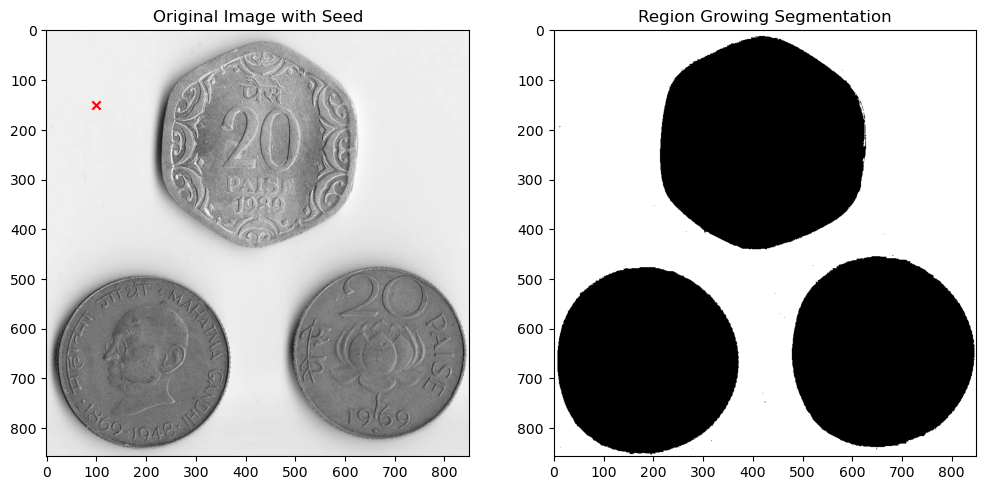

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def region_growing(image, seed, threshold=30):
    """
    Perform region growing segmentation.
    
    Parameters:
        image: Grayscale image (2D NumPy array)
        seed: Tuple (x, y) - starting pixel coordinates
        threshold: Intensity difference threshold for growing
    
    Returns:
        Segmented binary image (white = region, black = background)
    """
    # Get image dimensions
    height, width = image.shape

    # Create an empty region mask (same size as image)
    segmented = np.zeros_like(image, dtype=np.uint8)

    # Get seed pixel intensity
    seed_intensity = image[seed[1], seed[0]]

    # Define 4-connectivity (up, down, left, right)
    neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    # Stack for pixels to visit
    stack = [seed]

    while stack:
        x, y = stack.pop()  # Get the last added pixel

        # Check if already visited
        if segmented[y, x] == 255:
            continue

        # Check intensity difference
        if abs(int(image[y, x]) - int(seed_intensity)) < threshold:
            segmented[y, x] = 255  # Mark pixel as part of the region

            # Add neighboring pixels to the stack
            for dx, dy in neighbors:
                new_x, new_y = x + dx, y + dy
                if 0 <= new_x < width and 0 <= new_y < height:
                    stack.append((new_x, new_y))

    return segmented

# Load image in grayscale
image = cv2.imread("coin.jpg", cv2.IMREAD_GRAYSCALE)

# Define a seed point (you can change this manually)
seed_point = (100, 150)  # Example (x, y) coordinate

# Perform region growing segmentation
segmented_image = region_growing(image, seed_point)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.scatter(*seed_point, color='red', marker='x')  # Mark seed point
plt.title("Original Image with Seed")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title("Region Growing Segmentation")

plt.show()


In [12]:
### Threshold based Segmentation

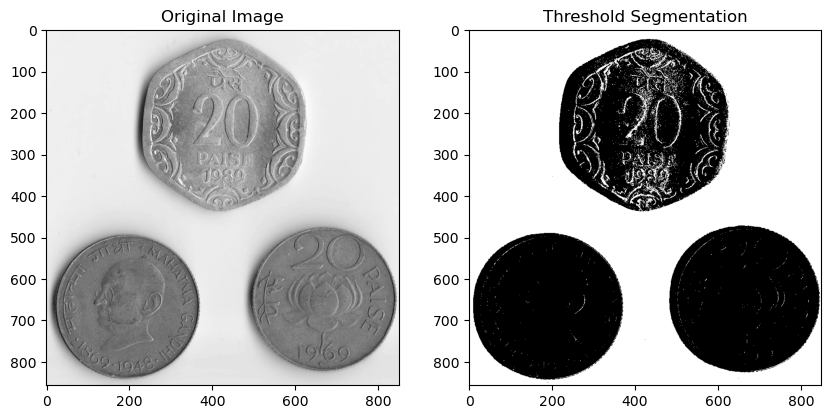

In [11]:

# Apply thresholding (Otsu’s method automatically finds the best threshold)
_, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(thresholded, cmap='gray')
plt.title("Threshold Segmentation")

plt.show()


In [13]:
### Canny Edge based

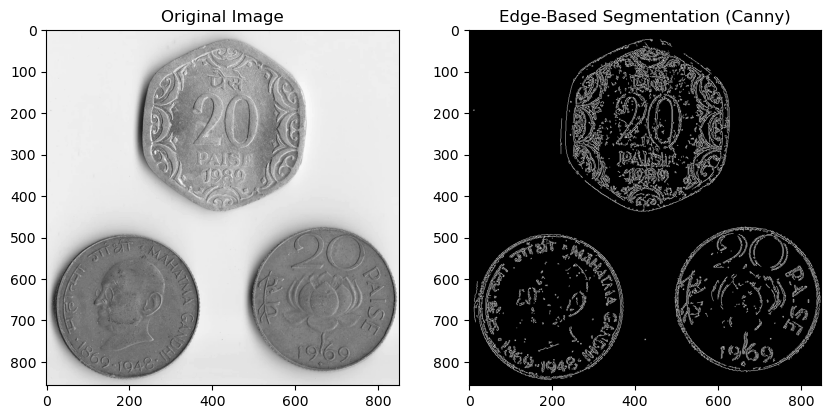

In [14]:

edges = cv2.Canny(image, 100, 200)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Edge-Based Segmentation (Canny)")

plt.show()


In [18]:
### Watershed based

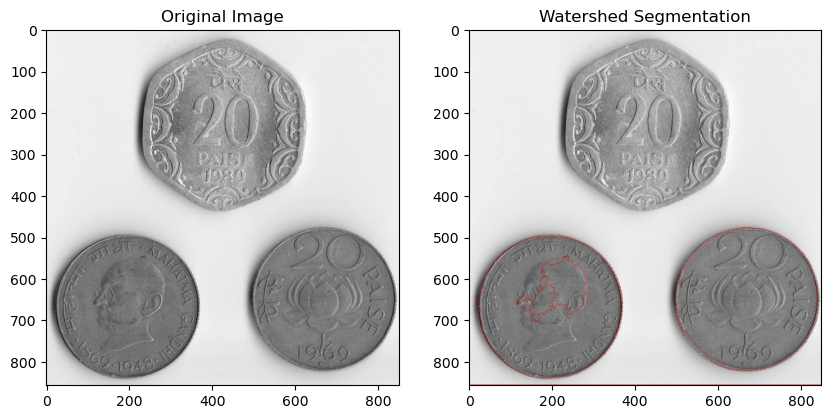

In [19]:

# Convert to grayscale and apply threshold
_, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using morphological operations
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Label markers
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply Watershed
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.watershed(image_color, markers)
image_color[markers == -1] = [255, 0, 0]  # Mark boundaries in red

# Show results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(image_color)
plt.title("Watershed Segmentation")

plt.show()


In [ ]:
Method	Best For
Thresholding - Simple images with high contrast
Edge Detection (Canny)-Finding object boundaries
Region Growing - Segmentation based on pixel similarity
Watershed-Separating overlapping objects